# Modelling a Pandemic SG

### Group: A+PLZ
#### Zhu Bangyuan (ZHUB0005@e.ntu.edu.sg)
#### Li Jingyuan (e200220@e.ntu.edu.sg)
#### Yang Peishi (YANG0645@e.ntu.edu.sg)
#### Yu Linyan   (LYU008@e.ntu.edu.sg)

#### Nanyang Technological University

#### Oct 2021

# Background 

Covid-19 cases are at a record high in Singapore, and the high number of confirmed daily cases has placed a strain on the limited healthcare system. 
Moreover, the number of deaths recorded is also rising, mostly among the elderly over the age of 60.
These therefore pose an urgent and prolonged threat to Singapore’s heath and well-being.
The problem we would like to put forward is what will be the future trend in Singapore for Covid-19. 
In our research, we explored three factors: daily confirmed cases, new recoveries, and daily deaths.
We used the logistic regression model to predict the number of cases in the future. 
By performing this method of analysis, we hope to reduce errors in estimating subsequent cases and aid in the planning and development of measures during the Covid-19 endemic in Singapore.


# Prerequesites

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from random import randint
sb.set()

# Data Acquisition

To begin the analysis, we extracted our data set from  https://data.world/hxchua/covid-19-singapore/workspace/file?filename=Covid-19+SG.xlsx and imported the data into Excel as Covid-19 SG.csv.

Firstly, a read_csv command is performed in Jupyter to breifly look at the dataset

In [2]:
covidData = pd.read_csv('Covid-19 SG.csv')
covidData.head()

,Date,DailyConfirmed,NewRecoveries,False Positives Found,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,DailyDeaths,...,Phase,Cumulative Vaccine Doses,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Perc population completed at least one dose,Perc population completed vaccination,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO
0,2020-01-23,1,0,NaN,0,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-24,2,0,NaN,0,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,1,0,NaN,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-26,0,0,NaN,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,1,0,NaN,0,0,0,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
covidData.shape

(647, 33)

In [4]:
covidData.dtypes

Date                                                              object
DailyConfirmed                                                     int64
NewRecoveries                                                      int64
False Positives Found                                            float64
Daily Discharged                                                   int64
Passed but not due to COVID                                        int64
Cumulative Discharged                                              int64
Discharged to Isolation                                            int64
Still Hospitalised                                                 int64
DailyDeaths                                                        int64
Tested positive demise                                             int64
Daily Imported                                                     int64
Daily Local transmission                                           int64
Local cases residing in dorms MOH report           

In [5]:
covidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 33 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Date                                                           647 non-null    object 
 1   DailyConfirmed                                                 647 non-null    int64  
 2   NewRecoveries                                                  647 non-null    int64  
 3   False Positives Found                                          538 non-null    float64
 4   Daily Discharged                                               647 non-null    int64  
 5   Passed but not due to COVID                                    647 non-null    int64  
 6   Cumulative Discharged                                          647 non-null    int64  
 7   Discharged to Isolation                                       

In [6]:
covidData.describe()

,DailyConfirmed,NewRecoveries,False Positives Found,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,DailyDeaths,Tested positive demise,...,Requires Oxygen Supplementation,Linked community cases,Unlinked community cases,Cumulative Vaccine Doses,Cumulative Individuals Vaccinated,Cumulative Individuals Vaccination Completed,Sinovac vaccine doses,Cumulative individuals using Sinovac vaccine,Doses of other vaccines recognised by WHO,Cumulative individuals using other vaccines recognised by WHO
count,647.000000,647.000000,538.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,...,145.000000,160.000000,160.000000,1.200000e+02,1.200000e+02,1.200000e+02,9.000000,9.000000,80.000000,80.000000
mean,301.840804,251.698609,0.148699,251.735703,0.009274,49004.109737,3408.401855,310.046368,0.610510,0.012365,...,97.586207,30.450000,14.618750,8.295745e+06,4.392539e+06,3.879330e+06,118138.222222,78083.444444,180066.400000,92550.212500
std,737.282571,631.793962,2.323110,631.760759,0.095926,28362.766902,6545.023173,527.849517,2.309574,0.123801,...,130.206171,38.199707,26.721454,1.192874e+06,2.882246e+05,8.200380e+05,10618.138923,3019.922603,38125.334479,18985.378822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,5.485548e+06,3.376297e+06,2.109251e+06,104061.000000,74121.000000,42623.000000,24130.000000
25%,12.000000,11.000000,0.000000,11.000000,0.000000,39619.000000,90.500000,13.000000,0.000000,0.000000,...,11.000000,2.000000,1.000000,7.485895e+06,4.297320e+06,3.310855e+06,108815.000000,75856.000000,162833.500000,85373.750000
50%,31.000000,25.000000,0.000000,25.000000,0.000000,58214.000000,248.000000,83.000000,0.000000,0.000000,...,26.000000,12.000000,3.500000,8.689759e+06,4.506378e+06,4.306486e+06,115970.000000,77095.000000,179602.000000,86772.000000
75%,191.000000,175.500000,0.000000,175.500000,0.000000,61281.500000,3552.000000,349.500000,0.000000,0.000000,...,163.000000,49.750000,17.000000,9.135696e+06,4.593508e+06,4.480897e+06,129787.000000,81555.000000,203645.750000,106014.750000
max,5324.000000,4348.000000,41.000000,4348.000000,1.000000,162873.000000,31166.000000,4229.000000,18.000000,2.000000,...,450.000000,156.000000,185.000000,1.004902e+07,4.734669e+06,4.675888e+06,131497.000000,81709.000000,239146.000000,122126.000000


# Data Cleanup and extraction

The raw data set included various statistics such as those in intensive care unit and cumulative vaccine dose which are not required in our analysis. Hence, we will make use of the following method to obtain the 3 informations needed which are Daily Confirmed, New Recoveries and Daily Deaths

In [7]:
def covidDataNum(covidData):
    covidDataNum = pd.DataFrame(covidData[["Date"]])
    covidDataNum["DailyConfirmed"] = covidData["DailyConfirmed"]
    covidDataNum["NewRecoveries"] = covidData["NewRecoveries"] 
    covidDataNum["DailyDeaths"] = covidData["DailyDeaths"]
    for col in ["DailyConfirmed", "NewRecoveries", "DailyDeaths"]:
        covidDataNum.loc[:, col] = covidDataNum[col].astype(float)
    return covidDataNum


covidDataNum = covidDataNum(covidData)
covidDataNum

,Date,DailyConfirmed,NewRecoveries,DailyDeaths
0,2020-01-23,1.0,0.0,0.0
1,2020-01-24,2.0,0.0,0.0
2,2020-01-25,1.0,0.0,0.0
3,2020-01-26,0.0,0.0,0.0
4,2020-01-27,1.0,0.0,0.0
...,...,...,...,...
642,2021-10-26,3277.0,2856.0,10.0
643,2021-10-27,5324.0,3172.0,10.0
644,2021-10-28,3432.0,4348.0,15.0
645,2021-10-29,4248.0,3011.0,16.0


# Calculate the cumulative confirmed,cumulative recoveries, cumulative deathes

Next, since we will be using the logistic regression model to predict the future Covid-19 trend in Singapore,we need the cumulative values of the data set. Therefore, we proceed to calculate the cumulative confirmed, cumulative recoveries and cumulative deaths as shown below.

In [8]:
covidData = pd.read_csv('Covid-19 SG.csv')
covidData_DailyConfirmed = pd.DataFrame(covidData["DailyConfirmed"])

In [9]:
print(covidData_DailyConfirmed["DailyConfirmed"])

0         1
1         2
2         1
3         0
4         1
       ... 
642    3277
643    5324
644    3432
645    4248
646    3112
Name: DailyConfirmed, Length: 647, dtype: int64


In [10]:
covidData_CumConfirmed = pd.DataFrame(covidData_DailyConfirmed["DailyConfirmed"])
covidData_CumConfirmed["CumConfirmed"] = covidData_DailyConfirmed["DailyConfirmed"].cumsum()
print(covidData_CumConfirmed["CumConfirmed"])

0           1
1           3
2           4
3           4
4           5
        ...  
642    179175
643    184499
644    187931
645    192179
646    195291
Name: CumConfirmed, Length: 647, dtype: int64


In [11]:
covidData = pd.read_csv('Covid-19 SG.csv')
covidData_NewRecoveries = pd.DataFrame(covidData["NewRecoveries"])

In [12]:
print(covidData_NewRecoveries["NewRecoveries"])

0         0
1         0
2         0
3         0
4         0
       ... 
642    2856
643    3172
644    4348
645    3011
646    3912
Name: NewRecoveries, Length: 647, dtype: int64


In [13]:
covidData_CumRecoveries = pd.DataFrame(covidData_NewRecoveries["NewRecoveries"])
covidData_CumRecoveries["CumRecoveries"] = covidData_NewRecoveries["NewRecoveries"].cumsum()
print(covidData_CumRecoveries["CumRecoveries"])

0           0
1           0
2           0
3           0
4           0
        ...  
642    148406
643    151578
644    155926
645    158937
646    162849
Name: CumRecoveries, Length: 647, dtype: int64


In [14]:
covidData = pd.read_csv('Covid-19 SG.csv')
covidData_DailyDeaths= pd.DataFrame(covidData["DailyDeaths"])

In [15]:
print(covidData["DailyDeaths"])

0       0
1       0
2       0
3       0
4       0
       ..
642    10
643    10
644    15
645    16
646    14
Name: DailyDeaths, Length: 647, dtype: int64


In [16]:
covidData_CumDeaths = pd.DataFrame(covidData_DailyDeaths["DailyDeaths"])
covidData_CumDeaths["CumDeaths"] = covidData_DailyDeaths["DailyDeaths"].cumsum()
print(covidData_CumDeaths["CumDeaths"])

0        0
1        0
2        0
3        0
4        0
      ... 
642    340
643    350
644    365
645    381
646    395
Name: CumDeaths, Length: 647, dtype: int64


In [17]:
def covidData_Cum(covidData):
    covidData_Cum = pd.DataFrame(covidData[["Date"]])
    covidData_Cum["CumConfirmed"] = covidData_CumConfirmed["CumConfirmed"]
    covidData_Cum["CumRecoveries"] = covidData_CumRecoveries["CumRecoveries"]
    covidData_Cum["CumDeaths"] = covidData_CumDeaths["CumDeaths"]
    for col in ["CumConfirmed", "CumRecoveries", "CumDeaths"]:
        covidData_Cum.loc[:, col] = covidData_Cum[col].astype(float)
    return covidData_Cum


covidData_Cum = covidData_Cum(covidData)
covidData_Cum

,Date,CumConfirmed,CumRecoveries,CumDeaths
0,2020-01-23,1.0,0.0,0.0
1,2020-01-24,3.0,0.0,0.0
2,2020-01-25,4.0,0.0,0.0
3,2020-01-26,4.0,0.0,0.0
4,2020-01-27,5.0,0.0,0.0
...,...,...,...,...
642,2021-10-26,179175.0,148406.0,340.0
643,2021-10-27,184499.0,151578.0,350.0
644,2021-10-28,187931.0,155926.0,365.0
645,2021-10-29,192179.0,158937.0,381.0


# Extract data type individually

Following on, we would extract each data type separately and analyse them one by one using boxplot, histplot and violinplot so as to understand the respective trend.

In [18]:
covidData_DailyConfirmed = pd.DataFrame(covidData['DailyConfirmed'])
print("Data type : ", type(covidData_DailyConfirmed))
print("Data dims : ", covidData_DailyConfirmed.size)
covidData_DailyConfirmed.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  647


,DailyConfirmed
0,1
1,2
2,1
3,0
4,1


In [19]:
covidData_DailyConfirmed .describe()

,DailyConfirmed
count,647.000000
mean,301.840804
std,737.282571
min,0.000000
25%,12.000000
50%,31.000000
75%,191.000000
max,5324.000000


In [20]:
covidData_NewRecoveries = pd.DataFrame(covidData['NewRecoveries'])
print("Data type : ", type(covidData_NewRecoveries))
print("Data dims : ", covidData_NewRecoveries.size)
covidData_NewRecoveries.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  647


,NewRecoveries
0,0
1,0
2,0
3,0
4,0


In [21]:
covidData_NewRecoveries.describe()

,NewRecoveries
count,647.000000
mean,251.698609
std,631.793962
min,0.000000
25%,11.000000
50%,25.000000
75%,175.500000
max,4348.000000


In [22]:
covidData_DailyDeaths = pd.DataFrame(covidData['DailyDeaths'])
print("Data type : ", type(covidData_DailyDeaths))
print("Data dims : ", covidData_DailyDeaths.size)
covidData_DailyDeaths.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  647


,DailyDeaths
0,0
1,0
2,0
3,0
4,0


In [23]:
covidData_DailyDeaths .describe()

,DailyDeaths
count,647.000000
mean,0.610510
std,2.309574
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,18.000000


<AxesSubplot:>

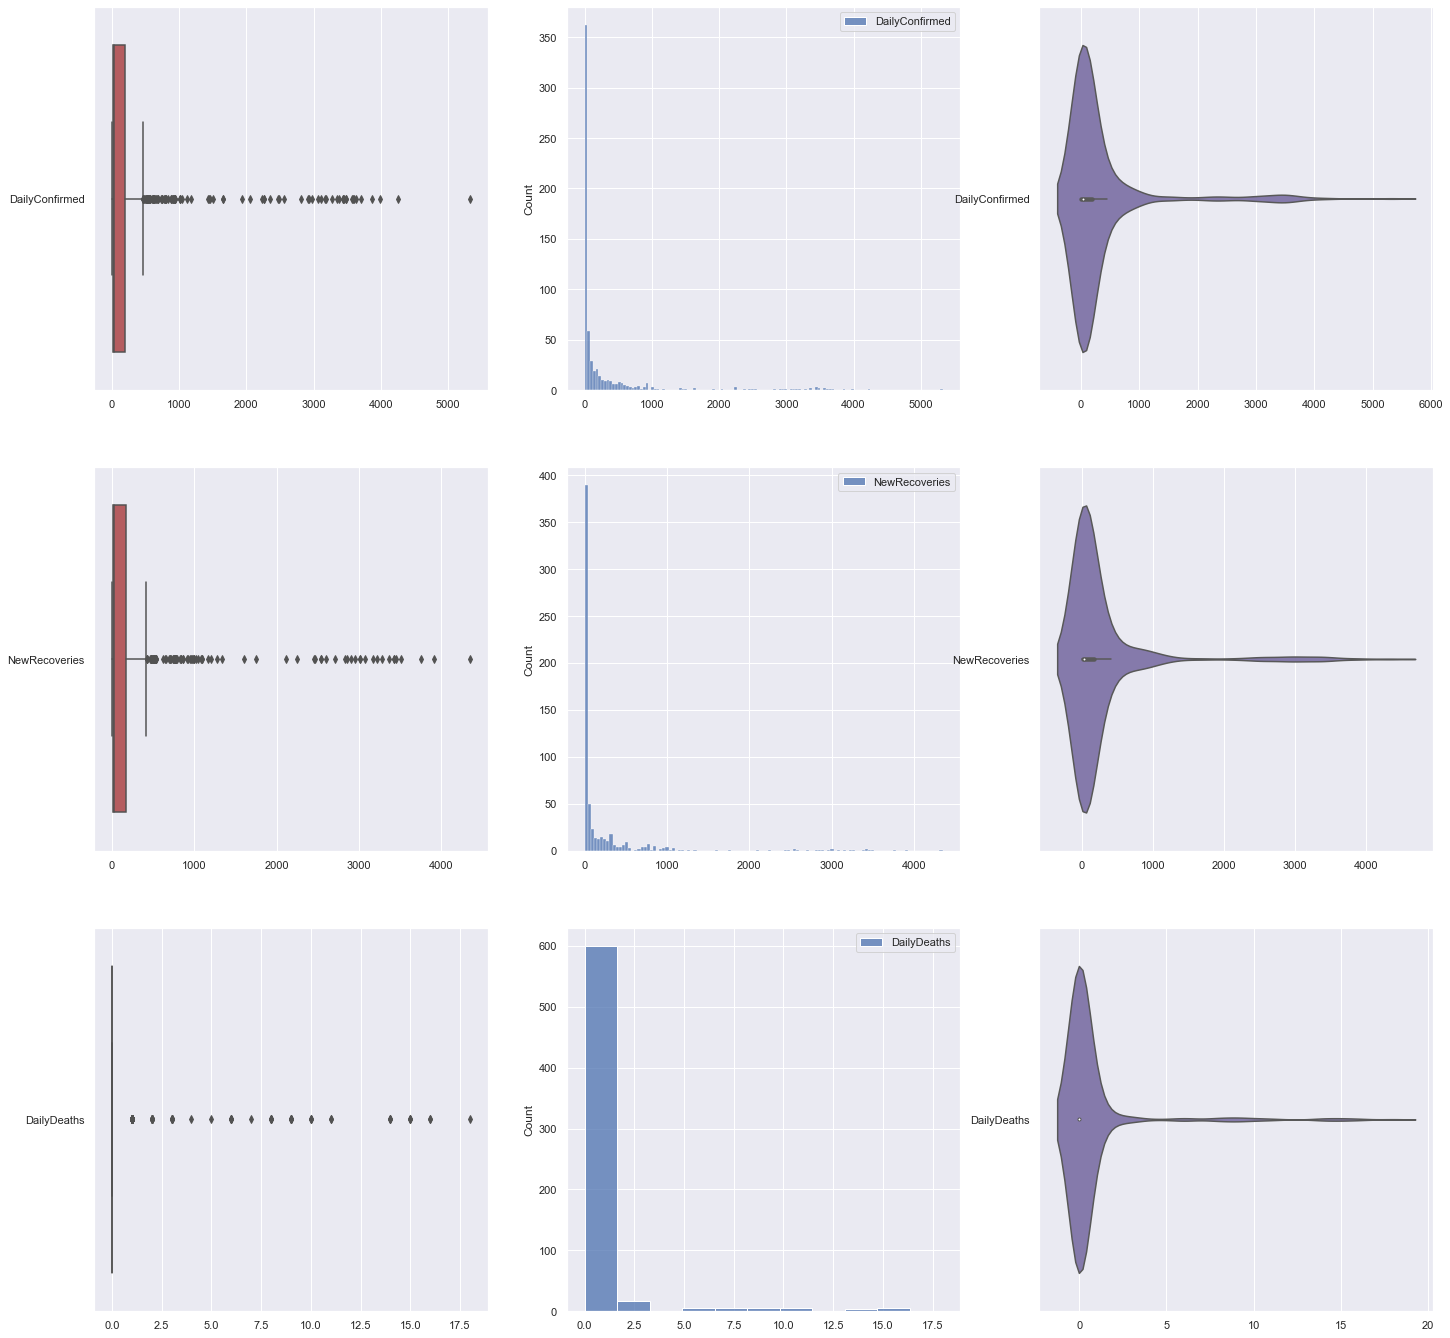

In [24]:
f, axes = plt.subplots(3, 3, figsize=(24, 24))

sb.boxplot(data=covidData_DailyConfirmed, orient = "h", ax = axes[0,0],color='r')
sb.histplot(data=covidData_DailyConfirmed, ax = axes[0,1],color='g')
sb.violinplot(data=covidData_DailyConfirmed, orient = "h",ax = axes[0,2],color='m')

sb.boxplot(data=covidData_NewRecoveries, orient = "h", ax = axes[1,0],color='r')
sb.histplot(data=covidData_NewRecoveries, ax = axes[1,1],color='g')
sb.violinplot(data=covidData_NewRecoveries, orient = "h",ax = axes[1,2],color='m')

sb.boxplot(data=covidData_DailyDeaths, orient = "h", ax = axes[2,0],color='r')
sb.histplot(data=covidData_DailyDeaths, ax = axes[2,1],color='g')
sb.violinplot(data=covidData_DailyDeaths,orient = "h",ax = axes[2,2],color='m')

# Exploratory Data Analysis

After exploring each variable, we would like to study the trend of the entire data used. In order to do so, we made use of line plot to depict the 3 data types below.

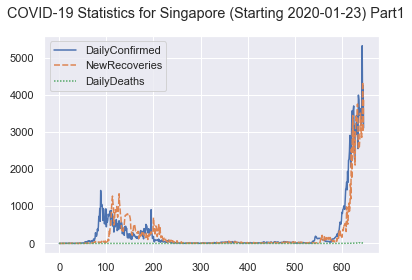

In [25]:
fig = plt.figure()
plt.suptitle("COVID-19 Statistics for Singapore (Starting 2020-01-23) Part1")
sb.lineplot(data=covidDataNum)
plt.show()

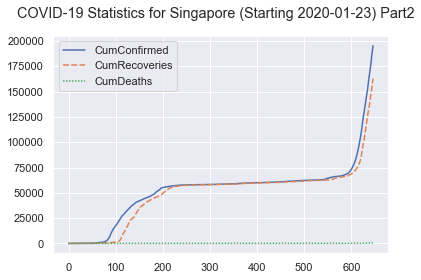

In [26]:
fig = plt.figure()
plt.suptitle("COVID-19 Statistics for Singapore (Starting 2020-01-23) Part2")
sb.lineplot(data=covidData_Cum)
plt.show()

It can be observed from both numeric and cumulative line plots that the trend for confirmed cases and new recoveries are highly similar. This means that rate of recovery is significantly high. 
Both the daily deaths and cumulative deaths line plots are close to a straight line, which illustrate that the number of deaths per day is at a very small percentage compared to the daily confirmed and recovery cases.

# Data Preparation

Based on our examination, we realised that the daily confirmed cases, new recoveries and daily deaths due to Covid-19 in Singapore are impacted by the Covid-19 measurements implemented by the goverment to a large extent. Thus,to improve on the accuracy of our prediction model, we will remove the data before 14 June 2021. This is in view of the fact that the strict Covid-19 measurements before this date have resulted in a notable low number of daily confirmed cases and thus, recoveries and daily deaths.

Using the function below, we managed to obtain the number of days from 2021-06-14 to 2021-10-30.

In [27]:
d0 = datetime(2021, 6, 14)
d1 = datetime(2021, 10, 30)
delta = d1 - d0 
print(delta.days+1)

139


Next, we use the following function and input the number of days of data required. By doing so, we would be able to filter the data and only utilise those dated after 2021-06-14 till 2021-10-30.

In [28]:
covidDataNum_part = covidDataNum.tail(139)
covidDataNum_part

,Date,DailyConfirmed,NewRecoveries,DailyDeaths
508,2021-06-14,25.0,25.0,0.0
509,2021-06-15,14.0,17.0,0.0
510,2021-06-16,24.0,20.0,0.0
511,2021-06-17,27.0,29.0,0.0
512,2021-06-18,16.0,27.0,0.0
...,...,...,...,...
642,2021-10-26,3277.0,2856.0,10.0
643,2021-10-27,5324.0,3172.0,10.0
644,2021-10-28,3432.0,4348.0,15.0
645,2021-10-29,4248.0,3011.0,16.0


In [29]:
covidData_Cum_part = covidData_Cum.tail(139)
covidData_Cum_part

,Date,CumConfirmed,CumRecoveries,CumDeaths
508,2021-06-14,62381.0,61892.0,34.0
509,2021-06-15,62395.0,61909.0,34.0
510,2021-06-16,62419.0,61929.0,34.0
511,2021-06-17,62446.0,61958.0,34.0
512,2021-06-18,62462.0,61985.0,34.0
...,...,...,...,...
642,2021-10-26,179175.0,148406.0,340.0
643,2021-10-27,184499.0,151578.0,350.0
644,2021-10-28,187931.0,155926.0,365.0
645,2021-10-29,192179.0,158937.0,381.0


We divided the dataset into train and test dataset. The train dataset is 75% of the total dataset. In spite of this, the train data is just 104 rows so it maight not be trained properly. We do not have time to gather much information under this real circumstances.

In [30]:
split_rate = 0.75
demarcation_point = round((646 - 508) * 0.75)
initial_cases = 62381.0

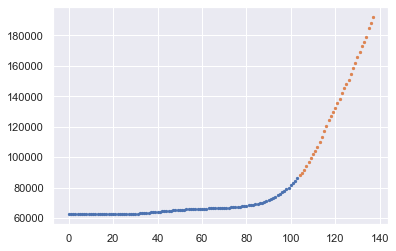

In [31]:
covid_cumconfirmed = covidData_Cum_part["CumConfirmed"]
train_cases_number = covid_cumconfirmed[0:demarcation_point]
train_day_time = len(train_cases_number)

train_xdata = np.array([ i for i in range(train_day_time) ])
train_ydata = train_cases_number

test_cases_number = covid_cumconfirmed[demarcation_point:138]
test_day_time = len(test_cases_number)

test_xdata = np.array([ i+104 for i in range(test_day_time) ])
test_ydata = test_cases_number

plt.scatter(train_xdata, train_ydata, label='data',s=5)
plt.scatter(test_xdata, test_ydata, label='data',s=5)

# The Logistic Regression Model

The logistic function was proposed by Belgian mathematician and biologist Pierre Francois Verhulst when he was studying the population growth model. It is an improvement on the Malthusian population model. The model is often used in fields such as describing populations, the growth of infectious diseases, and the forecast of commodity sales.

The model can be expressed as following

$$P(t) = \frac{K}{1+(\frac{K}{P0}-1)\times e^-rt}$$

K corresponds to the highest possible number, r is the initial growth rate, P0 is the initial number.

We use the least squares method to simulate our train data.

In [32]:
from scipy.optimize import curve_fit as curve_fit

def func(x, k, a, b):
 return k/(1+(k/b-1)*np.exp(-a*x))

popt, pcov = curve_fit(func, train_xdata, train_ydata - initial_cases, method='dogbox', \
                        bounds=([1000., 0.01, 10.],[5000000., 1.0, 1000.]))
k = popt[0]
a = popt[1]
b = popt[2]

We perform the simulation and check the accuracy of function in the test dataset.

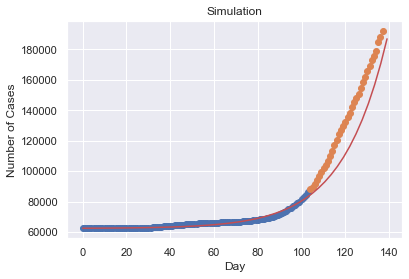

In [33]:
plt.scatter(train_xdata, train_ydata, label='data')
plt.scatter(test_xdata, test_ydata, label='data')
testdays = 139 - demarcation_point

x = np.linspace(0, len(train_xdata)+testdays)
y = func(x, *popt)


plt.plot(x, y + initial_cases,  color='r', label='fit')
plt.xlabel('Day')
plt.ylabel('Number of Cases')
plt.title('Simulation')
plt.show( )

The yellow pionts are the test dataset. As seen from the gragh, the fitted function is quite similar to the actual function. We then try to predict total cases in the next 21 days. 

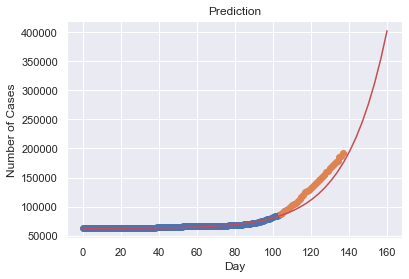

In [34]:
plt.scatter(train_xdata, train_ydata, label='data')
plt.scatter(test_xdata, test_ydata, label='data')

x = np.linspace(0, len(train_xdata)+testdays+21)
y = func(x, *popt)

plt.plot(x, y + initial_cases,  color='r', label='fit')
plt.xlabel('Day')
plt.ylabel('Number of Cases')
plt.title('Prediction')
plt.show( )      

# Conclusion